<a href="https://colab.research.google.com/github/sizhky/AutoTrain/blob/master/nbs/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Data and Libraries

In [1]:
%%capture
# Setup imports
try:
    import timm
except:
    !pip install -U torch-snippets typer imgaug timm fastai

In [2]:
# Setup Data
%load_ext autoreload
%autoreload 2

from torch_snippets import *
from fastai.vision.all import *

# If running locally from AutoTrain/nbs
if not os.path.exists('/content') and P().resolve().stem != 'AutoTrain':
    %cd ..

# If running from colab
if os.path.exists('/content') and not os.path.exists('/content/AutoTrain'):
    !git clone https://github.com/sizhky/AutoTrain

# change present working directory
if not P().resolve().stem == 'AutoTrain':
    %cd AutoTrain

# !git pull origin enhancement/fastai-classification
# !git checkout enhancement/fastai-classification

if not os.path.exists('imagenette2-160'):
    o = untar_data(URLs.IMAGENETTE_160)
    !cp -r {o} ./


2021-09-25 09:13:44.649 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


/mnt/sda1/code/AutoTrain


## Verify Config

In [3]:
!cat configs/classification_imagenette.ini

[project]
owner: sizhky
name: imagenette
location: ${project.name}
model_directory: ${project.location}/models
type: classification
num_classes: 10

[architecture]
image_size: 224
[architecture.backbone]
model: efficientnet_b0
# everytime you change the model, vector size 
# must match the model's backbone output.
vector_size: 1280
[architecture.head]
@head: custom_head
head_input_size: ${architecture.backbone.vector_size}
num_classes: ${project.num_classes}

[training]
dir: imagenette2-160
train_ratio: 0.8
[training.preprocess]
@preprocess_function: my_preprocess
image_size: ${architecture.image_size}

[training.data]
train_dir: ${training.dir}/train
validation_dir: ${training.dir}/validation

[training.scheme]
epochs: 2
freeze_epochs: 2
# initial_checkpoint: ${online_training.save_dir}
# mixup augmentation
mixup: 0.5
# cutmix
cutmix: 0.5 
mixup_switch_prob: 0.3
amp: true
# random augmentations
aa: rand-m9-mstd0.5
batch_size: 2
output: ${project.model_directory}/trained-model-v1
outpu

In [4]:
os.environ['CONFIG'] = 'configs/classification_imagenette.ini'
!python auto_train_classification/train.py

2021-09-25 09:13:50.294 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'
2021-09-25 09:13:56.801 | INFO     | __main__:train_model:35 - Training from scratch!
2021-09-25 09:14:42.880 | INFO     | __main__:find_best_learning_rate:22 - LR Plot is saved at imagenette/find_lr_plot.png
2021-09-25 09:14:42.880 | INFO     | __main__:train_model:40 - Using lr: 0.0002290867705596611
['Epoch, Train Loss, Validation Loss, Validation Accuracy, Time']
[0, 1.670011043548584, None, None, '00:24']
[1, 0.7566663026809692, None, None, '00:15']
[0, 0.6101420521736145, None, None, '00:18']
[1, 0.5624898672103882, None, None, '00:18']
2021-09-25 09:15:59.674 | INFO     | __main__:train_model:50 - Saved weights of size ~18 MB to imagenette/models/trained-model-v1/model.pth


---
## Validate

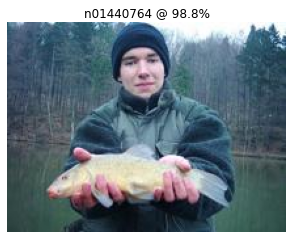

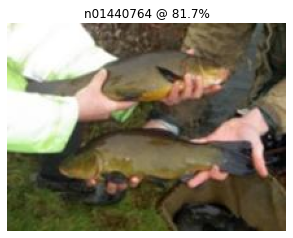

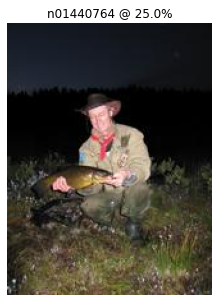

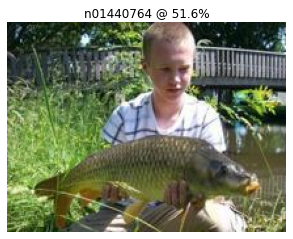

[(» imagenette2-160/val/n01440764/n01440764_14650.JPEG,
  'n01440764',
  tensor(0.9881)),
 (» imagenette2-160/val/n01440764/n01440764_3202.JPEG,
  'n01440764',
  tensor(0.8171)),
 (» imagenette2-160/val/n01440764/n01440764_600.JPEG,
  'n01440764',
  tensor(0.2495)),
 (» imagenette2-160/val/n01440764/n01440764_4942.JPEG,
  'n01440764',
  tensor(0.5162))]

In [6]:
from auto_train_classification.infer import infer
infer('imagenette2-160/val/n01440764/')